Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
#import sys 
#!{sys.executable} -m conda install xgboost

#!pip install xgboost
#!pip uninstall xgboost --yes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from scipy.special import boxcox, inv_boxcox
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data.index.is_monotonic

True

In [3]:
#Ресемплинг данных по одному часу.
data = data.resample('1H').sum()

Данные для анализа представляю собой таблицу, где индексами является дата и время вызова такси (в нашем случае это каждый час), а столбцом - целевой признак - количество заказов. Период анализа с 1 марта 2018 по 31 августа 2018. Все даты расположены в хронологическом порядке.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отлично)Приступим к самому интересному)
</div>

## Анализ

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


In [5]:
data.head(), \
data.tail()

(                     num_orders
 datetime                       
 2018-03-01 00:00:00         124
 2018-03-01 01:00:00          85
 2018-03-01 02:00:00          71
 2018-03-01 03:00:00          66
 2018-03-01 04:00:00          43,
                      num_orders
 datetime                       
 2018-08-31 19:00:00         136
 2018-08-31 20:00:00         154
 2018-08-31 21:00:00         159
 2018-08-31 22:00:00         223
 2018-08-31 23:00:00         205)

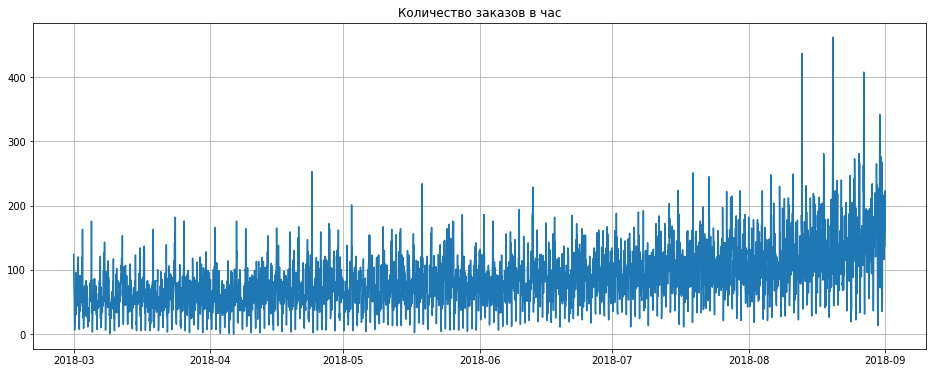

In [6]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Количество заказов в час')
plt.grid(True)
plt.show()

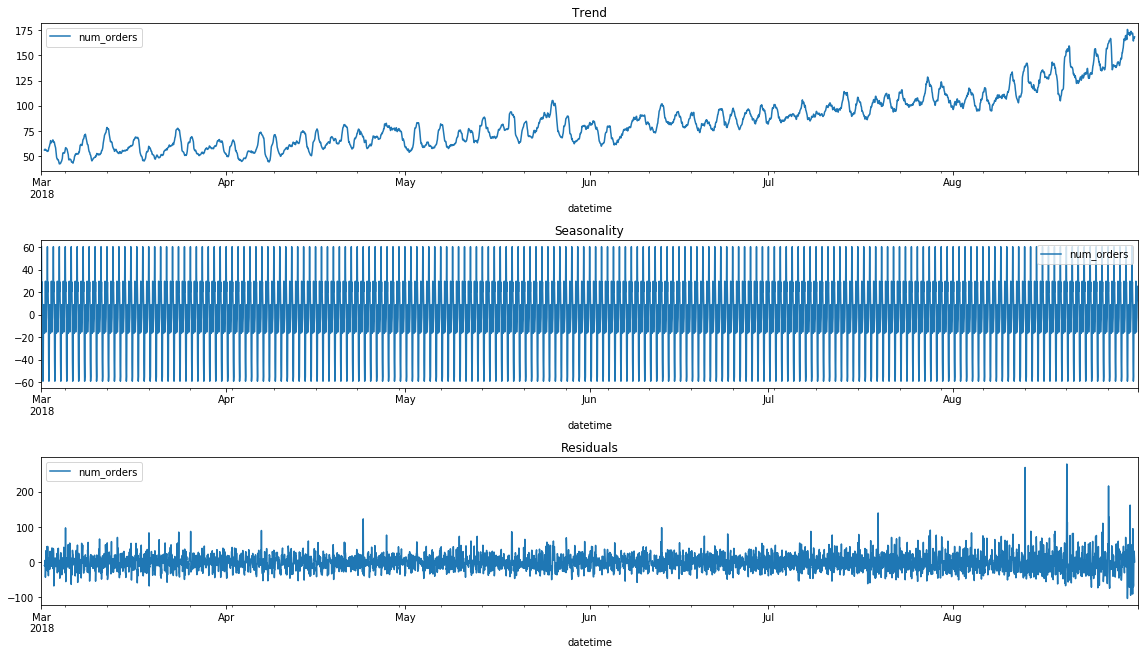

In [7]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(16, 12))

plt.subplot(412)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(413)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(414)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

plt.show()

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Хорошо, но в идеале показать эту линию)
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
А как же сезонность и остатки? Пожалуйста добавь)
</div>

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Cпасибо за ревью, дополнил графики.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Спасибо)
</div>

На графиках можно заметить линейный тренд на увеличение числа заказов. Явно выраженная цикличность не наблюдается.

In [8]:
#Проверим временной ряд на стационарность расширенным тестом Дики-Фуллера, уровень значимости - 0.01

#test = adfuller(data['num_orders'])
#print('adf: ', test[0])
#print('p-value: ', test[1])
#print('Critical values: ', test[4])
#if test[0]> test[4]['1%']: 
    #print('Есть единичные корни, ряд не стационарен')
#else:
    #print('Единичных корней нет, ряд стационарен')


#data['diff'] = data.diff()
#plt.figure(figsize=(16, 6))
#plt.plot(data['diff'])
#plt.title('Динамика изменения количества заказов')
#plt.grid(True)
#plt.show()

#data = data.dropna()

#test = adfuller(data['diff'])
#print('adf: ', test[0])
#print('p-value: ', test[1])
#print('Critical values: ', test[4])
#if test[0]> test[4]['1%']: 
    #print('Есть единичные корни, ряд не стационарен')
#else:
    #print('Единичных корней нет, ряд стационарен')

#fig, ax = plt.subplots(1,2,figsize=(16,6))
#plot_acf(data['diff'], ax=ax[0])
#plot_pacf(data['diff'], ax=ax[1])
#plt.show()

#По графику PACF видим что значение лагов - 6, по ACF значение скользящей средней - 2.

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
В дальнейшем столбец diff будет искажать данные, судя по значению метрики для линейной регрессии. Каким ещё образом можно стационарности добиться?
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Первое что приходит в голову, данная статья https://studepedia.org/index.php?vol=1&post=71344
    
Что значит искажать? И для чего нам нужна стационарность?
    
</div>

Создадим признаки для обучения модели. Исследуемый набор данных представляет сводную информацию по количество заказов такси в аэропортах, на основании этого строим предположение, что данные будут меняться в рамках часа (чаще летают утром и вечером) и дня недели (чаще летают в понедельник, пятницу и выходные). Дополним данныестолбцами с днём недели, часами. Кроме того добавим столбцы с лагами и скользящей средней.

In [9]:
# Функция для создания признаков

def make_features(data, max_lag, rolling_mean_size):
    data['weekday'] = data.index.weekday
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Не очень понимаю для чего комментарии в ячейке с функцией. И почему есть закомментированный код. С ним хуже? Как меняется результат?
</div>

Возьмём значение средней скользящей равное 24 - среднее за сутки, значения лагов, чтобы не делать модель очень сложной, возьмём равным 1, что позволит делать предсказание на 1 час вперёд.

In [10]:
# Подбор аргументов для минимизации метрики
make_features(data, 1, 24)

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Почему взяли именно такие значения? Пожалуйста поясни
</div>

## Обучение

In [11]:
# Разделим модель на обучающую и тестовые выборки
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop('num_orders', axis=1)
y_train= train['num_orders']
 
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

tscv = TimeSeriesSplit(n_splits=5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3950, 6), (442, 6), (3950,), (442,))

<div class="alert alert-warning">
    
**Комментарий ревьюера v_2**
     
В данном случае ты делаешь разбиение, но не обучаешь ничего. Зря закомментировал, делил на трейн и тест ты правильно)
    
Подбор стоит осуществлять подобным образом
    
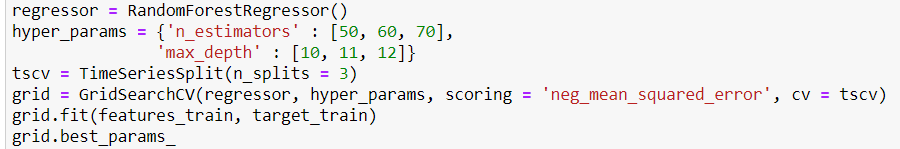

</div>

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Не понял, как при помощи TimeSeriesSplit сделать тестовую выборку размером 10% от исходных данных. В обучение был показан обычный вариант с train_test_split.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Нет) Этот метод нужен для другого, он нужен чтобы делать кросс-валидацию временного ряда. Если вредставить, что наш ряд это числа от 1 до 20. То данный метод дает возможность обучиться сначала на 1-5 и проверить на следующих блоках(например 6-8), потому обучаться на 1-10 и проверять уже на 11-14, таким образом мы убедимся что у нас нет переобучения и зависимости от данных
</div>

### Линейная регрессия

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions_train_lr = lr.predict(X_train)
predictions_test_lr = lr.predict(X_test)

RMSE_train_lr = np.sqrt(mean_squared_error(y_train, predictions_train_lr))
RMSE_test_lr = np.sqrt(mean_squared_error(y_test, predictions_test_lr))

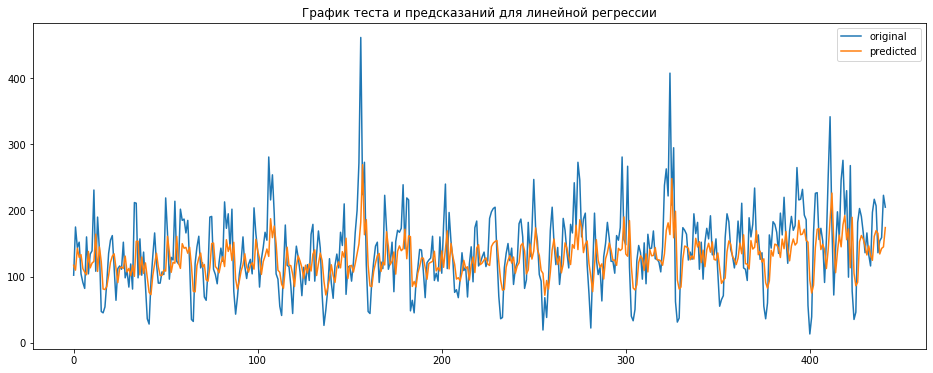

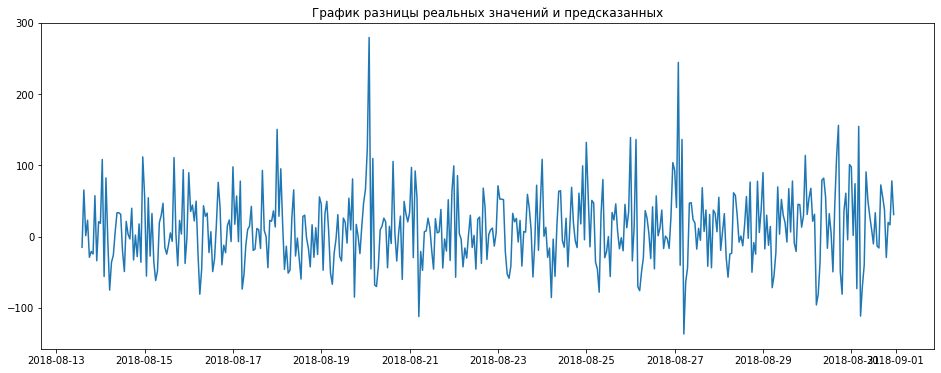

In [13]:
plt.figure(0, figsize=(16, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions_test_lr, label="predicted")
plt.title("График теста и предсказаний для линейной регрессии")
plt.legend()

plt.figure(1, figsize=(16, 6))
residuals_lr = y_test - predictions_test_lr
plt.plot(residuals_lr)
plt.title("График разницы реальных значений и предсказанных")

plt.show()

### Случайный лес

In [14]:
#Обучим модель

forest = RandomForestRegressor(random_state = 33)
forest.fit(X_train, y_train)

predictions_train_forest_0 = forest.predict(X_train)
predictions_test_forest_0 = forest.predict(X_test)

np.sqrt(mean_squared_error(y_train, predictions_train_forest_0)), \
np.sqrt(mean_squared_error(y_test, predictions_test_forest_0))

(9.989225714726183, 47.97119516554554)

In [15]:
# Подбор гиперпараметров

forest = RandomForestRegressor(random_state = 33)

param_dict = {
    "n_estimators": [10,100,1000],
    "max_depth":[2,4,6,8],
    "min_samples_split":range(2,8,2),
    "min_samples_leaf":range(1,6)
}
grid = GridSearchCV(forest, param_grid=param_dict, verbose=1, n_jobs=-1, cv = tscv)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 14.4min finished


{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [23]:
forest = RandomForestRegressor(max_depth = 8, min_samples_leaf =4, min_samples_split=6,
                                n_estimators = 100,random_state = 33)
forest.fit(X_train, y_train)

predictions_train_forest = forest.predict(X_train)
predictions_test_forest = forest.predict(X_test)

RMSE_train_forest = np.sqrt(mean_squared_error(y_train, predictions_train_forest))
RMSE_test_forest = np.sqrt(mean_squared_error(y_test, predictions_test_forest))


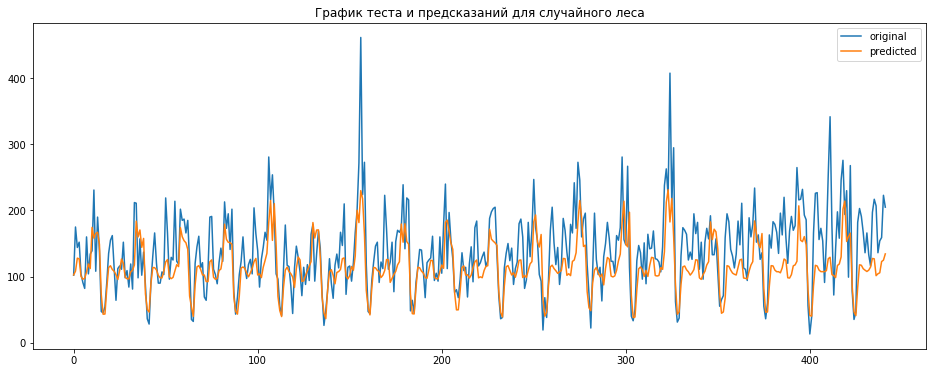

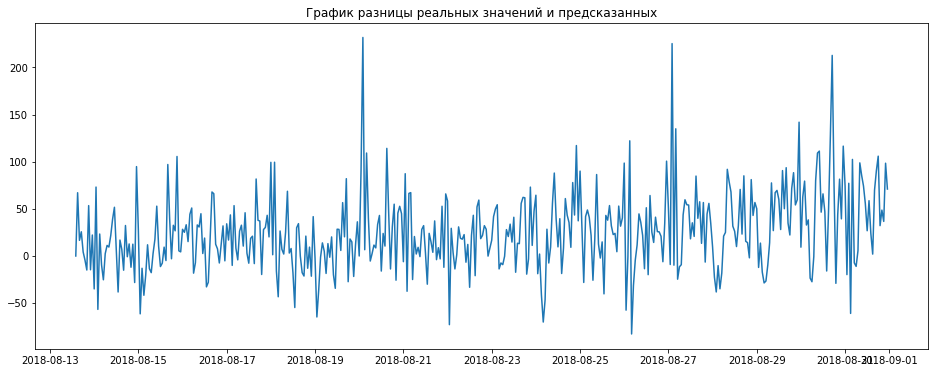

In [17]:
plt.figure(0, figsize=(16, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions_test_forest, label="predicted")
plt.title("График теста и предсказаний для случайного леса")
plt.legend()

plt.figure(1, figsize=(16, 6))
residuals_forest = y_test - predictions_test_forest
plt.plot(residuals_forest)
plt.title("График разницы реальных значений и предсказанных")

plt.show()

### XGBoost

In [18]:
xgbr = XGBRegressor(silent = True, random_state=33)
xgbr.fit(X_train, y_train)

predictions_train_xgbr_0 = xgbr.predict(X_train)
predictions_test_xgbr_0 = xgbr.predict(X_test)

np.sqrt(mean_squared_error(y_train, predictions_train_xgbr_0)), \
np.sqrt(mean_squared_error(y_test, predictions_test_xgbr_0))

(20.80863918365688, 46.72292670080058)

In [19]:
# Подбор гиперпараметров

xgbr = XGBRegressor(silent = True, random_state=33)

param_dict = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': range(2,10,2),
    'n_estimators': [10, 100,1000]
}
grid = GridSearchCV(xgbr, param_grid=param_dict, verbose=1, n_jobs=-1, cv = tscv)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.8min finished


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}

In [24]:
xgbr = XGBRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 1000, silent = True, random_state=33)
xgbr.fit(X_train, y_train)

predictions_train_xgbr = xgbr.predict(X_train)
predictions_test_xgbr = xgbr.predict(X_test)

RMSE_train_xgbr = np.sqrt(mean_squared_error(y_train, predictions_train_xgbr))
RMSE_test_xgbr = np.sqrt(mean_squared_error(y_test, predictions_test_xgbr))

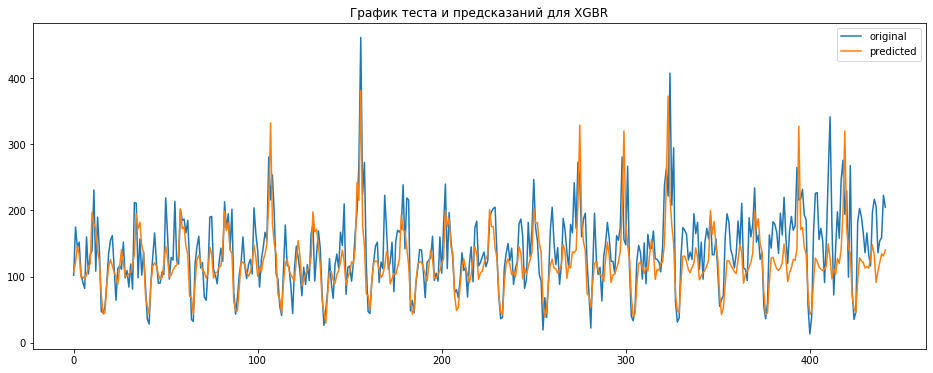

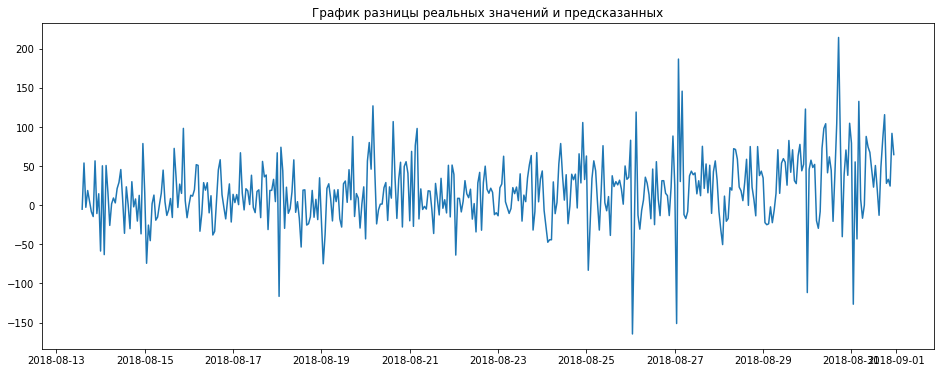

In [21]:
plt.figure(0, figsize=(16, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions_test_xgbr, label="predicted")
plt.title("График теста и предсказаний для XGBR")
plt.legend()

plt.figure(1, figsize=(16, 6))
residuals_xgbr = y_test - predictions_test_xgbr
plt.plot(residuals_xgbr)
plt.title("График разницы реальных значений и предсказанных")

plt.show()

## Тестирование

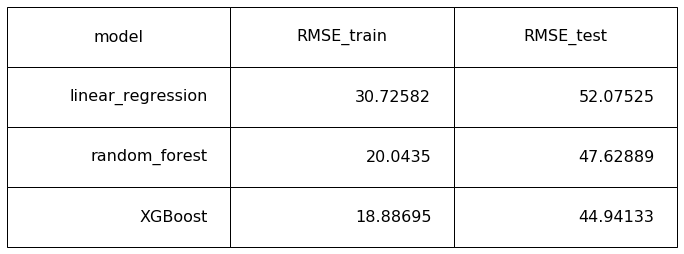

In [25]:
dict = {
    'model': ['linear_regression', 'random_forest', 'XGBoost'],
    'rmse_train': [RMSE_train_lr, RMSE_train_forest, RMSE_train_xgbr],
    'rmse_test': [RMSE_test_lr, RMSE_test_forest, RMSE_test_xgbr]
}
conclusion = pd.DataFrame(data= dict, index=['linear_regression', 'random_forest', 'XGBoost'],
                        columns = ['rmse_train', 'rmse_test'])

conclusion.reset_index(inplace=True)
conclusion.columns = ['model', 'RMSE_train', 'RMSE_test']
conclusion['RMSE_train'] = conclusion['RMSE_train'].round(5)
conclusion['RMSE_test'] = conclusion['RMSE_test'].round(5)

fig, ax = plt.subplots()

table = ax.table(cellText=conclusion.values, colLabels=conclusion.columns, loc='center')
table.set_fontsize(16)
table.scale(2,5)
ax.axis('off')

plt.show()

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Не увидел подбор гиперпараметров для моделей. Пожалуйста добавь
</div>

Для построения моделей использовали значения скользящей средней равное 24 для усреднение данных за сутки и лаг равный 1 - для предсказания следующего часа и чтобы не делать модель слишком сложной. Среди построенных моделей для предсказания числа заказов такси лучший результат показал XGBoost: RMSE = 44.94. 

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Давай проведем еще 1 итерацию, чтобы ты смог разобраться с tscv и задать еще свои вопросы)
    
И еще парочка вопросов от меня)
    
1)Почему в linreg нули?
    
2)В остальных моделях у тебя получился очень хороший результат. Как думаешь с чем это связано и верно ли это?)
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Кирилл, пока не могу принять проект. Пожалуйста ответь на мои вопросы и внеси доработки. Если будут вопросы или нужна помощь, пиши мне(можно через куратора, если нужно срочно), я всегда рад помочь)Чтобы мог принять проект, осталось совсем чуть-чуть)
 
Ниже прикреплю доп материалы для данного проекта и для следующего, вопросы по ним приветствуются)
    
время

https://www.youtube.com/watch?v=u433nrxdf5k&ab_channel=DataMininginAction

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
    
текст

https://www.youtube.com/watch?v=RVUpCdVhF60&ab_channel=%D0%9C%D1%8B%D1%81%D0%BB%D0%B8%D0%9B%D1%8E%D0%B4%D0%B5%D0%B9%D0%9C%D1%8B%D1%81%D0%BB%D0%B8%D0%9B%D1%8E%D0%B4%D0%B5%D0%B9

http://qudata.com/ml/ru/NN_Attention_BERT.html

https://www.youtube.com/watch?v=F3jsMAI5EF4&ab_channel=%D0%9B%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8%D0%B9%D0%A4%D0%9F%D0%9C%D0%98

https://habr.com/ru/company/oleg-bunin/blog/352614/

https://coderoad.ru/32016545/%D0%9A%D0%B0%D0%BA-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82-nltk-pos_tag

https://towardsdatascience.com/how-i-improved-my-text-classification-model-with-feature-engineering-98fbe6c13ef3
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_3**
     
Теперь всё отлично. Но очень странно, что не появилось ни одного твоего нового комментария. Если что-то не сохранилось, пришли мне пожалуйста через куратора)И конечно же вопросы, всегда рад помочь)Успехов в следующих проектах!)
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48